
Stage 0: Downloading the data

In [91]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [92]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


Stage 1: Import dependencies for the project



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd  #used to analyse the csv file
import cv2

from keras.callbacks import LearningRateScheduler, ModelCheckpoint
 
%matplotlib inline

Stage 2: Dataset preprocessing

In [0]:
np.random.seed(0)

In [0]:
#'with' is used whenever we need to execute 2 opeartions as a pair and invoke a block of code in between .Here we will open a file and 'with' will automatically close the file for us.

#In Python to save something on disc,it can be pickeld i.e. it can be serialsed before writing into the file.
#By serialising it,it converts all the objects to acharacter stream.
#So,Pickled files in python essentially contain serialised data thatcan be unpickled when desired .
#Since the character streams we are talking about now,contains all the necessary information to reconstruct the serialized objects,and thus unpick a link would be the inverse operation of pickling.
# TODO: Implement load the data here.(Deserialising the pickle files)


with open('german-traffic-signs/train.p', 'rb') as f:  #'rb' is read binary
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
#Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [96]:
print(type(train_data))

<class 'dict'>


In [97]:
print(train_data)

{'coords': array([[  6,   5,  21,  20],
       [  6,   6,  22,  22],
       [  5,   6,  22,  23],
       ...,
       [ 17,  15, 178, 155],
       [ 17,  15, 183, 160],
       [ 20,  18, 211, 184]], dtype=uint8), 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8), 'features': array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28

In [0]:
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [99]:
print(X_train.shape) #(34799, 32, 32, 3) =34799 images with 32*32 and depth=3(R,G,B)
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape)
print(X_test.shape[0])
print(y_test.shape[0])
print(X_val.shape)
print(X_val.shape[0])
print(y_val.shape[0])

(34799, 32, 32, 3)
34799
34799
(12630, 32, 32, 3)
12630
12630
(4410, 32, 32, 3)
4410
4410


In [0]:
#to verify our complex daaset is imported correctly

#code will run if conditions met, else won't run and will print the error message tha twe have specified below

# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [101]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

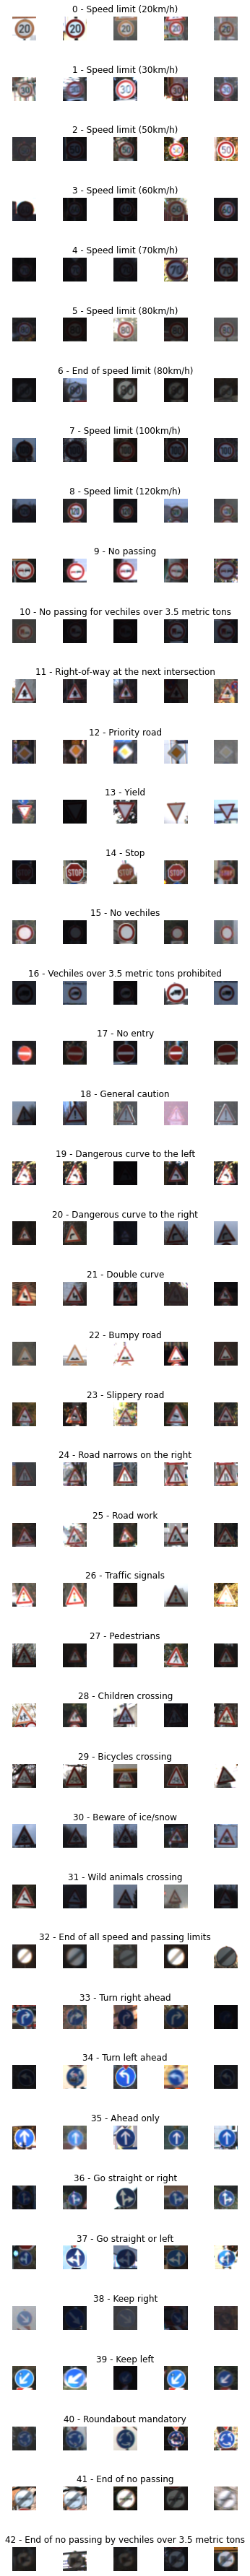

In [102]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
  for j, row in data.iterrows(): #iterrows will have index and series ,where seriesis 1D data
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))

In [103]:
print(len(num_of_samples))

43


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


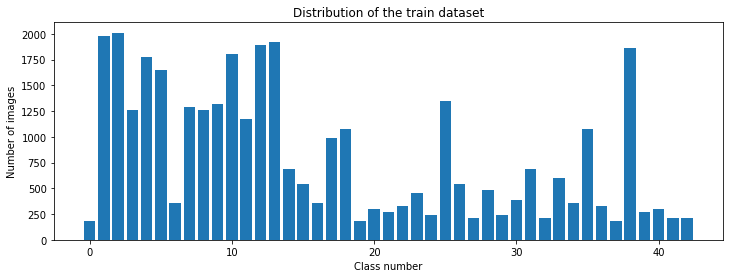

In [104]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

#Here we can see our traffic data is not uniform.some class has less data and some class has more data .

(32, 32, 3)
36


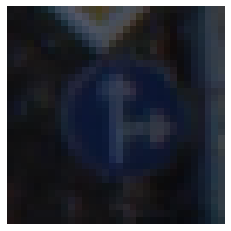

In [105]:
#In MNIST we have grayscale images. But here we have coloured(RGB) images having depth 3.

import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)  #32*32 image with depth 3
print(y_train[1000])

In [0]:
def grayscale(img):  #COVERTING OUR IMAGE TO GRAYSCALE AS COLOR IS NOT IMPORTANT. WE ARE REDUCING THE DEPTH FROM 3 TO 1. IT WILL REDUCE NO OF PARAMETERS.Hence lesscomputational resource.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


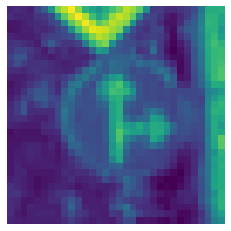

In [107]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


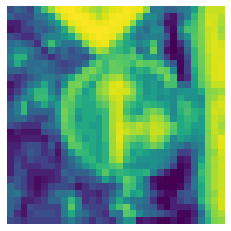

In [108]:
#histogram equalisation-some images are having more  light and some images are having less light. We are equalising/standarding  the images .so all images have simiar light eddect.It also enhances the contrast.
#Hence we will have uniform distribution of image intensity.

def equalize(img):
    img = cv2.equalizeHist(img)  #equalizeHist accepts only grayscale image
    return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

(34799, 32, 32)


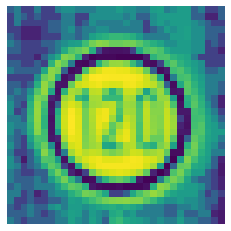

In [109]:
#combining last 3 steps.Preprocesing the data
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255 #image normalisation
    return img
  
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))
 
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
#setting the depth to 1 

X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

DATA AUGMENTATION





In [0]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,  #horizontal tranlation , Here maximum horizontal shift is 10% of image size
                            height_shift_range=0.1,  #vertical tranlation, Here maximum vertical shift is 10% of image size
                            zoom_range=0.2,       #range is 0 to1 .Hereits 0.2 .it means we can zoom between 0.8 to 1.2
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)  

#datagen is an iterator which generates batch of images when requested .It means,it doesnt perform operations 
#on all the images in our dataset as that would be very memory intensive due to the all images created .
#It only creates the augmented images when requested. 

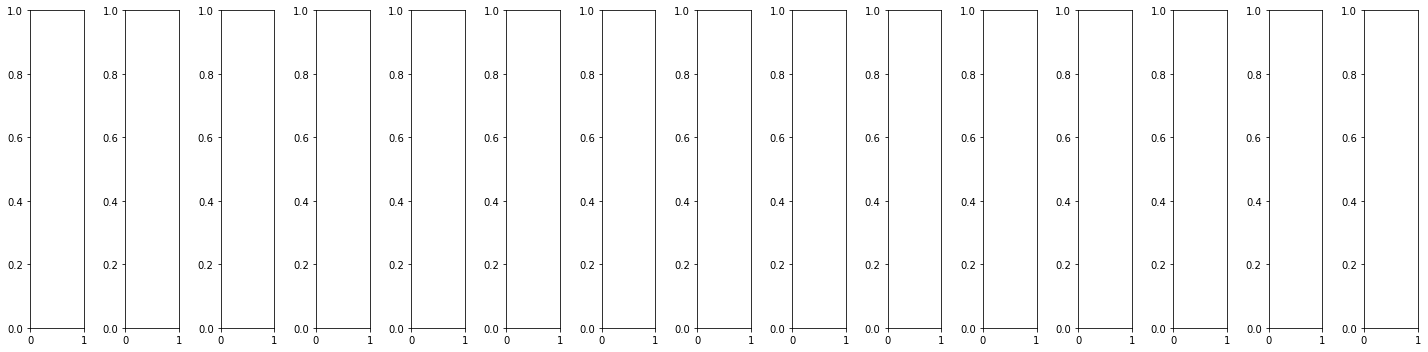

In [112]:
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15) #flow is requesting the iteerator to generate the images
X_batch, y_batch = next(batches) # storing the batches  #we will get 15 images each time when the iterator is being called

fig, axs = plt.subplots(1, 15, figsize=(20, 5)) #1=no of rows, 15 =no of columns
fig.tight_layout()

(15, 32, 32, 1)


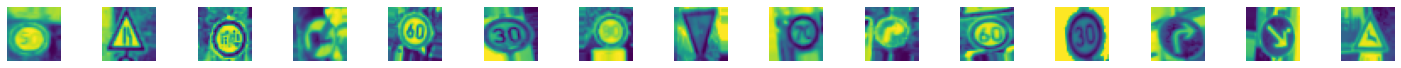

In [113]:
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [0]:
#one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val=to_categorical(y_val, 43)

Stage 3: Building an Covolutional Neural network

In [0]:
# create model
 
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [116]:
model = modified_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)              

Stage 4: Training the model

In [117]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)
#Augmented data will be created simultaneously and model will be trained
#batch_size=50, means our iterator will create 50 images at a time for our model to use
#steps_per_epoch=2000,means the amount of batches our image generator generates per epoch
#total images generated=batch_size*steps_per_epoch=50*2000=100000 images per epoch
#steps_per_epoch * batch_size = number_of_rows_in_train_data

'''
This is how it works,

When you provide 's' steps per epoch , Each 's' step will have 'x' batches each consisting 'n' samples is sent to fit_generator,

So, if you specify 5 steps per epoch, each epoch computes 'x' batches each consisting of 'n' samples 5 times, then the next epoch is started!
'''

Epoch 1/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.8793 - accuracy: 0.7430 - val_loss: 0.1226 - val_accuracy: 0.9612
Epoch 2/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.2256 - accuracy: 0.9298 - val_loss: 0.0814 - val_accuracy: 0.9814
Epoch 3/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.1459 - accuracy: 0.9549 - val_loss: 0.0408 - val_accuracy: 0.9896
Epoch 4/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.1171 - accuracy: 0.9637 - val_loss: 0.0704 - val_accuracy: 0.9796
Epoch 5/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0972 - accuracy: 0.9698 - val_loss: 0.0368 - val_accuracy: 0.9916
Epoch 6/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0848 - accuracy: 0.9740 - val_loss: 0.0253 - val_accuracy: 0.9932
Epoch 7/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.0766 - accuracy: 0.9770 - val_loss: 0.0252 -

"\nThis is how it works,\n\nWhen you provide 's' steps per epoch , Each 's' step will have 'x' batches each consisting 'n' samples is sent to fit_generator,\n\nSo, if you specify 5 steps per epoch, each epoch computes 'x' batches each consisting of 'n' samples 5 times, then the next epoch is started!\n"

Text(0.5, 0, 'epoch')

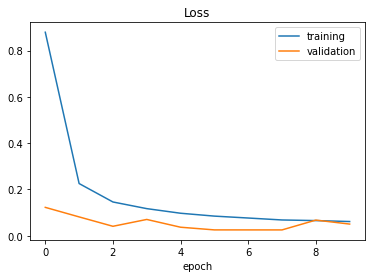

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

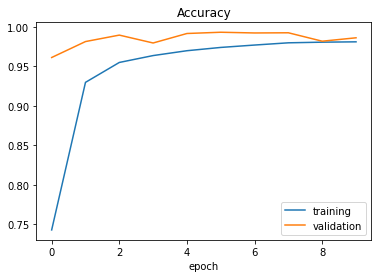

In [119]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Stage 5: Model evaluation and prediction

Our test accouracy improved by 3% compared to our last model

In [120]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.1457388196218294
Test accuracy: 0.9688836336135864


Stage 6: Predicting for random data

case 1----correct prediction

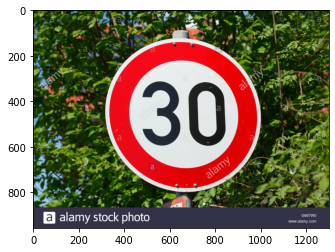

In [121]:
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

size of iamge before resize:  (956, 1300, 3)
size of iamge after resize:  (32, 32, 3)
(32, 32)
(1, 32, 32, 1)


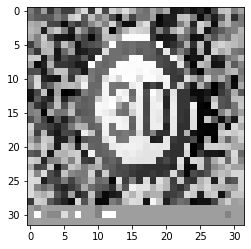

In [122]:
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (32, 32)) #since our neural network is trained on 32*32
print('size of iamge after resize: ',img.shape)
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1) #as our input_shape=(32, 32, 1)
print(img.shape)

In [123]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]


case 2----correct prediction

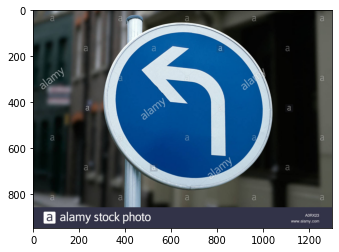

In [124]:
#case 2  correct prediction
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

size of iamge before resize:  (946, 1300, 3)
size of iamge after resize:  (32, 32, 3)
(32, 32)
(1, 32, 32, 1)


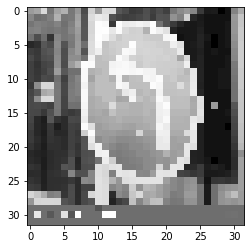

In [125]:
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (32, 32)) #since our neural network is trained on 32*32
print('size of iamge after resize: ',img.shape)
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1) #as our input_shape=(32, 32, 1)
print(img.shape)

In [126]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [12]


case 3----correct prediction

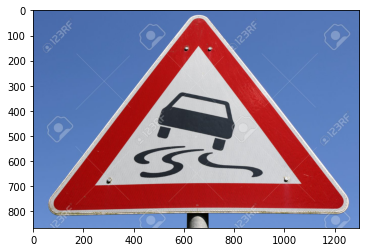

In [127]:
#case 3  Correct prediction
#predict internet number
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

size of iamge before resize:  (866, 1300, 3)
size of iamge after resize:  (32, 32, 3)
(32, 32)
(1, 32, 32, 1)


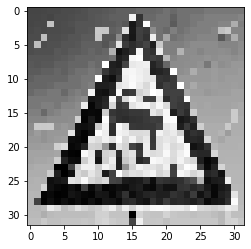

In [128]:
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (32, 32)) #since our neural network is trained on 32*32
print('size of iamge after resize: ',img.shape)
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1) #as our input_shape=(32, 32, 1)
print(img.shape)

In [129]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [23]


case 4----correct prediction

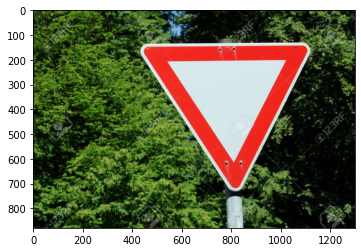

In [130]:
#predict internet number
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


size of iamge before resize:  (879, 1300, 3)
size of iamge after resize:  (32, 32, 3)
(32, 32)
(1, 32, 32, 1)


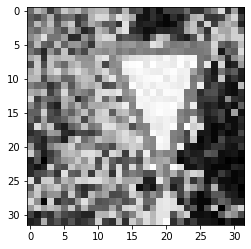

In [131]:
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (32, 32)) #since our neural network is trained on 32*32
print('size of iamge after resize: ',img.shape)
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1) #as our input_shape=(32, 32, 1)
print(img.shape)

In [132]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [13]


case 5----correct prediction

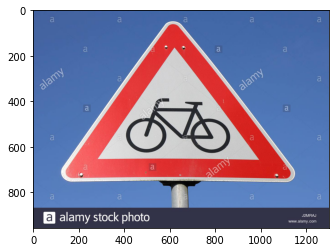

In [133]:
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

size of iamge before resize:  (956, 1300, 3)
size of iamge after resize:  (32, 32, 3)
(32, 32)
(1, 32, 32, 1)


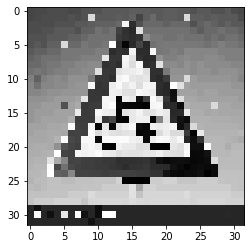

In [134]:
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (32, 32)) #since our neural network is trained on 32*32
print('size of iamge after resize: ',img.shape)
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1) #as our input_shape=(32, 32, 1)
print(img.shape)

In [135]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [24]
